# Model preparation

In [1]:
import requests
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
# Utility functions
def cleanTable(table):
    table = table.drop(columns=['#', 'Last 6', 'F', 'A', 'GD'])
    return table

def addQualification(table):
    table['Qualification'] = 0
    for rank in range(0,8):
        table['Qualification'][rank] = 1
    return table

In [4]:
# Fetching the historical standings tables of MLS
# Web scrapping sky sports data for the current MLS table

standings = pd.DataFrame(columns=['Team', 'Pl', 'W', 'D', 'L', 'Pts', 'Qualification'])

for year in range (2018, 2023):
    url = f"https://www.skysports.com/mls-table/{year}" 
    result = requests.get(url)
    df = pd.read_html(result.text, match=f"American MLS League - Eastern Conference {year}/{int(str(year)[-2:])+1}")
    df = df[0]
    cleanedTable = cleanTable(df)
    finalTable = addQualification(cleanedTable)
    standings = standings.append(finalTable, ignore_index=True)

/var/folders/qh/sckhy9cx1y13y4gg32cmhqv80000gn/T/ipykernel_40164/3298483254.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['Qualification'][rank] = 1


In [5]:
# Removing the team name columns and converting all other columns into integer type

finalData = standings.drop(columns=['Team'])
finalData = finalData.astype('int')
finalData.head()

,Pl,W,D,L,Pts,Qualification
0,34,22,5,7,71,1
1,34,21,6,7,69,1
2,34,16,8,10,56,1
3,34,14,9,11,51,1
4,34,14,9,11,51,1


<AxesSubplot:>

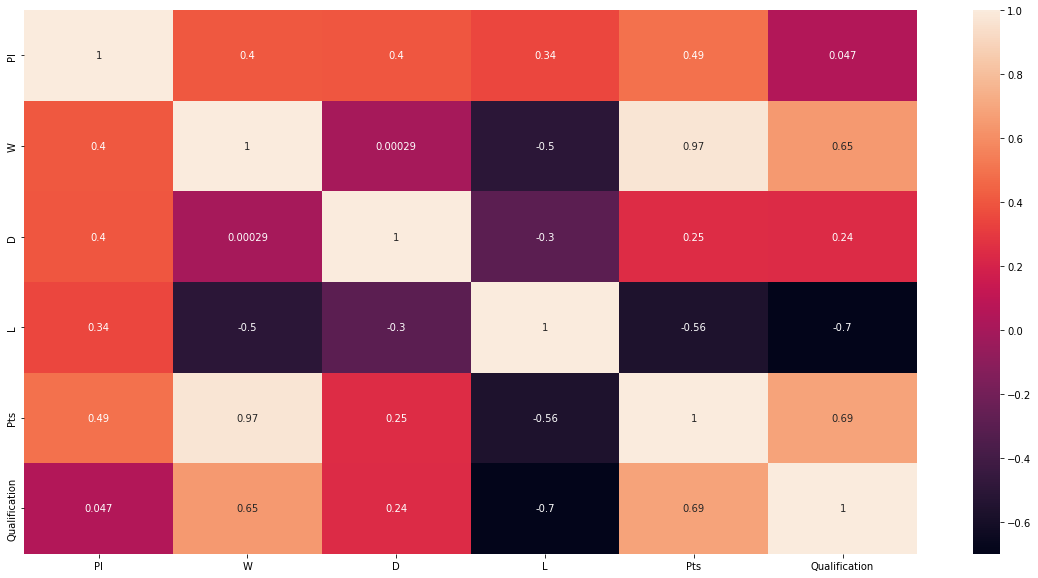

In [6]:
# Columns correlation

plt.figure(figsize=(20,10))
sns.heatmap(finalData.corr(), annot=True)

## Model Preparation

Our data is already cleaned and prepared hence major updates are not required. We can directly jump into training procedures

In [16]:
# Input data
x = finalData.iloc[:, 1:5]

# Output data (qualification)
y = finalData.iloc[:, 5]

In [18]:
# Splitting the data into test and train
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=0)

In [19]:
# Feature scaling into single range
standScalar = StandardScaler()                 # Creating an object of the scalar
xtrain = standScalar.fit_transform(xtrain)
xtest = standScalar.transform(xtest)

### Logistic regression

In [20]:
# Training our model
mlsPredictorLR = LogisticRegression(random_state = 0)
mlsPredictorLR.fit(xtrain, ytrain)

# Predicting using the model
y_pred = mlsPredictorLR.predict(xtest)

Accuracy :  0.9411764705882353


Text(0.5, 24.0, 'Predicted labels')

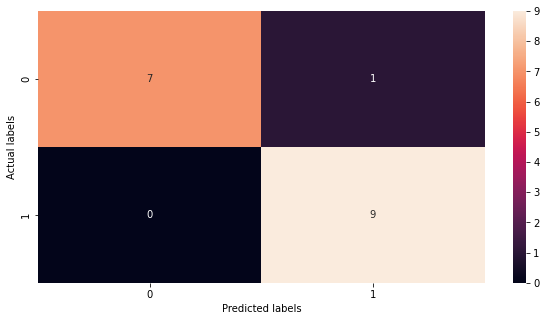

In [21]:
# Printing the accuracy
print ("Accuracy : ", accuracy_score(ytest, y_pred))

# Confusion Matrix
confusionMatrix = confusion_matrix(ytest, y_pred)
plt.figure(figsize=(10,5))
sns.heatmap(confusionMatrix, annot=True)
plt.ylabel("Actual labels")
plt.xlabel("Predicted labels")

In [22]:
# Saving the model
pickle.dump(mlsPredictorLR, open('mls_model.pkl', 'wb'))